### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
min_qubits=2
max_qubits=4
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Image Recognition - Method 1

Image Recognition Benchmark Program - Qiskit
... execution starting at Oct 07, 2023 05:28:25 UTC
shape of x: (70000, 784)
shape of y: (70000,)
Data normalized
... batch length = 50
************
Executing [1] circuit for num_qubits = 2
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 14, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 12, 0.167, 3.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.009, 0.005, 0.0 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0, 0

Data normalized
... batch length = 50
************
Executing [1] circuit for num_qubits = 3
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 36, 0.155
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 28, 0.2, 9.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0

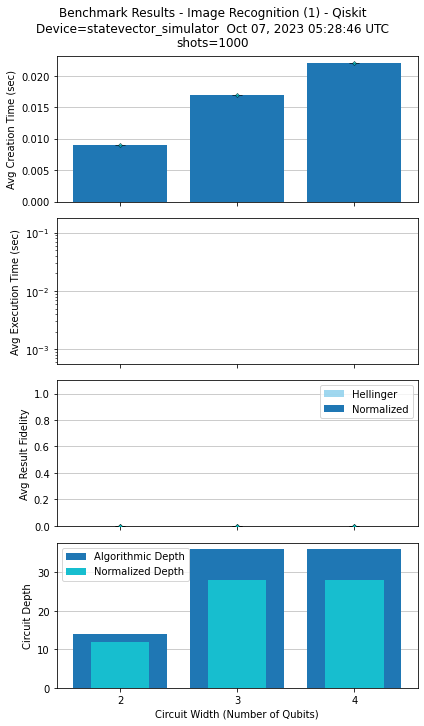

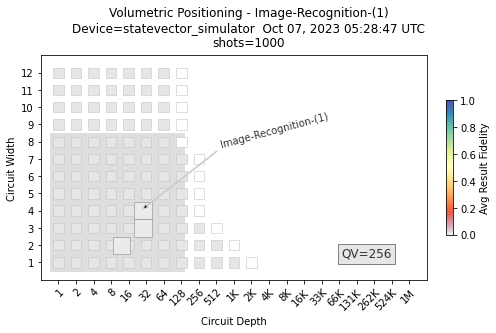

In [3]:
import sys
sys.path.insert(1, "image_recognition/qiskit")
import image_recognition_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

image_recognition_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Image Recognition - Method 2  

Image Recognition Benchmark Program - Qiskit
... execution starting at Oct 07, 2023 05:30:41 UTC
shape of x: (70000, 784)
shape of y: (70000,)
Data normalized
... batch length = 50
************
Executing [qcnn uniform] circuit for num_qubits = 2
DEBUG calling callback_thetas_array
Saved batch index 1 and thetas_array to a json file
Batch 1 loss: 0.36875938874121916 accuracy: 0.36
DEBUG calling callback_thetas_array
Saved batch index 2 and thetas_array to a json file
Batch 2 loss: 0.3307903724246063 accuracy: 0.36
DEBUG calling callback_thetas_array
Saved batch index 3 and thetas_array to a json file
Batch 3 loss: 0.33679028429675734 accuracy: 0.38
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 14, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 12, 0.167, 3.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.744, 0.498, 0.032 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.0

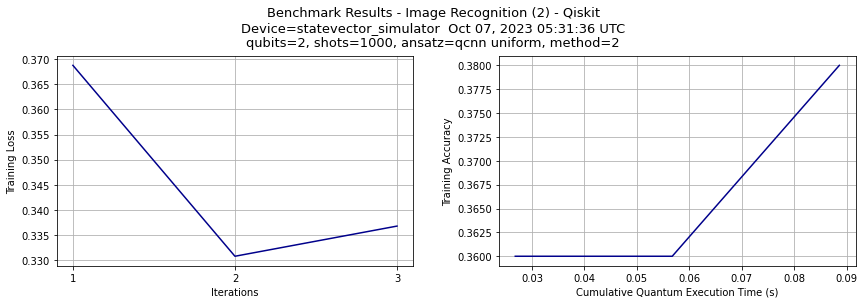

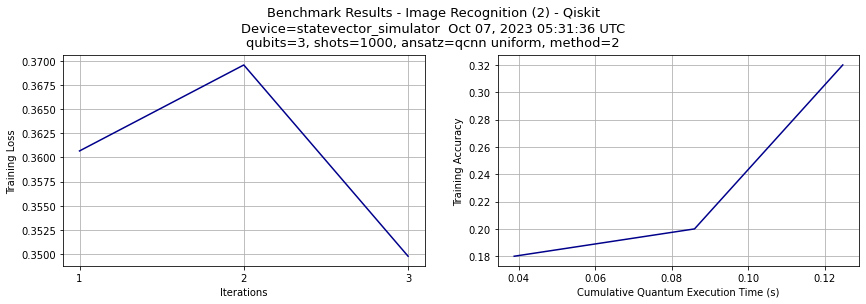

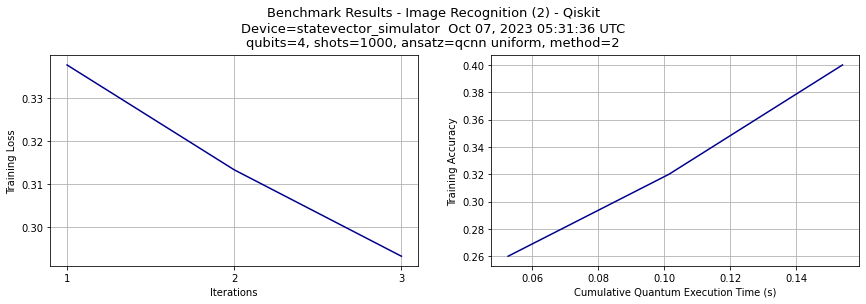

----- Cumulative Plots for all qubit groups -----


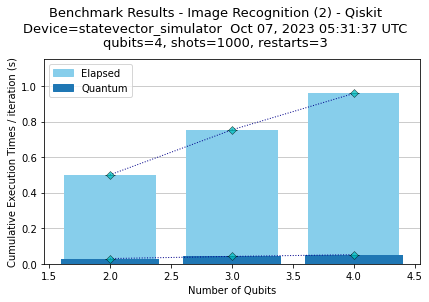

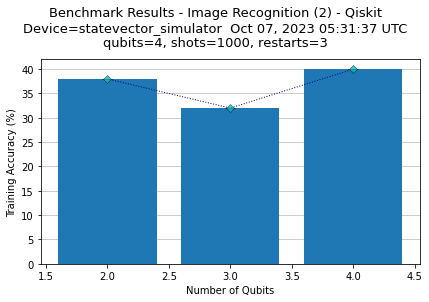

In [5]:
import sys
sys.path.insert(1, "image_recognition/qiskit")
import image_recognition_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

# execute and display options
objective_func_type = 'approx_ratio'
score_metric=['approx_ratio', 'cvar_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

image_recognition_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False,max_iter=3,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

In [ ]:
import os, image_recognition_benchmark
backend_id = "qasm_simulator"
image_recognition_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                score_metric=['approx_ratio', 'cvar_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time'])